In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("D:\data-analytics\Social_Network_Ads.csv")
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# CONFUSION-MATRIX

In [2]:
data.drop(columns=["User ID","Gender"], inplace = True)

In [3]:
x = data.iloc[:,:-1]
y = data["Purchased"]

In [4]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 320, dtype: int64

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [6]:
lr.score(x_test,y_test)

0.8875

In [7]:
from sklearn.metrics import confusion_matrix , precision_score, recall_score, f1_score

In [8]:
cm = confusion_matrix(y_test, lr.predict(x_test))
cm

array([[50,  2],
       [ 7, 21]], dtype=int64)

<AxesSubplot:>

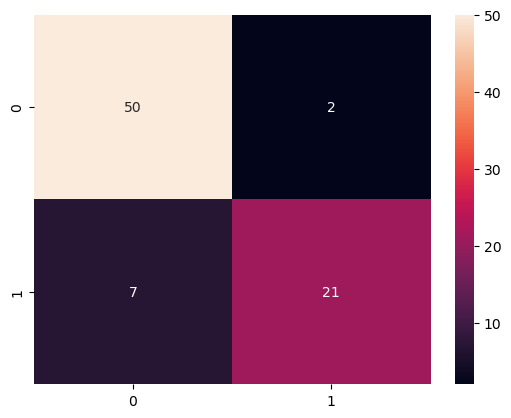

In [9]:
sns.heatmap(cm, annot=True) #yeh hmari hai confusion matrix jo ki graphical form me hai

In [10]:
rec = recall_score(y_test, lr.predict(x_test))
rec

0.75

In [11]:
precision = precision_score(y_test, lr.predict(x_test))
precision

0.9130434782608695

In [12]:
f1 = f1_score(y_test, lr.predict(x_test))
f1

0.8235294117647058

# DATA IMBALANCING

In [13]:
data["Purchased"].value_counts()
# 0 -> 257 and 1 -> 143 yaani data me imbalancing hai issliye jab bhi hum iss data me hum modelko train krenge toh woh 0 ke taraf biased ho jayega , issko dooor krne ke liye hum use krenge imbalancing technique ka


0    257
1    143
Name: Purchased, dtype: int64

In [14]:
lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
lr.score(x_test , y_test)

0.8875

In [16]:
lr.predict([[46, 28000]]) #yeh most of the cases me 0 hi de rha hai bhale isska answer 1 h tb bhii, kyuki issme data imbalancing hai

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [17]:
# !pip install imblearn

#random undder sampling

In [18]:
#undersampling me data me jo bda hai woh kam wale ke barabar ho jayega!
#kam -> 150 , jyda -> 500 toh , kam-150, jyda->150

from imblearn.under_sampling import RandomUnderSampler
ru = RandomUnderSampler()
ru.fit(x,y)

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The RandomUnderSampler or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin

RandomUnderSampler()

In [19]:
ru_x , ru_y = ru.fit_resample(x,y)
ru_y 

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


12     0
58     0
56     0
248    0
110    0
      ..
393    1
395    1
396    1
397    1
399    1
Name: Purchased, Length: 286, dtype: int64

In [20]:
ru_y.value_counts()

0    143
1    143
Name: Purchased, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(ru_x, ru_y, test_size=0.2, random_state=42)
y_train

131    0
174    0
52     0
16     1
195    0
      ..
240    1
179    0
145    0
381    1
359    0
Name: Purchased, Length: 228, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()

lr1.fit(x_train,y_train)
lr1.score(x_test , y_test)

0.7931034482758621

In [23]:
lr1.predict([[17, 25000]])

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

#Random Over Sampling

In [24]:
#oversampling me data me jo kam hai woh bade wale ke barabar ho jayega! yani kam wala jyda ho jayega
#kam -> 150 , jyda -> 500 toh , kam-500, jyda->500


from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
ro.fit(x,y)

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The RandomOverSampler or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`

RandomOverSampler()

In [25]:
ro_x , ro_y = ro.fit_resample(x,y)
ro_y 

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


0      0
1      0
2      0
3      0
4      0
      ..
509    1
510    1
511    1
512    1
513    1
Name: Purchased, Length: 514, dtype: int64

In [26]:
ro_y.value_counts()

0    257
1    257
Name: Purchased, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(ro_x, ro_y, test_size=0.2, random_state=42)
y_train

320    1
329    1
173    0
272    1
493    1
      ..
106    0
270    0
348    0
435    1
102    0
Name: Purchased, Length: 411, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()

lr2.fit(x_train,y_train)
lr2.score(x_test , y_test)

0.8640776699029126

In [29]:
lr2.predict([[17, 25000]])

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# NAIVE-BAYES

In [49]:
dataset = pd.read_csv("D:\data-analytics\placement-dataset.csv")
dataset.drop(columns=["Unnamed: 0"], inplace=True)
dataset.head(10)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
5,7.1,48.0,1
6,5.7,143.0,0
7,5.0,63.0,0
8,6.1,156.0,0
9,5.1,66.0,0


<AxesSubplot:xlabel='cgpa', ylabel='iq'>

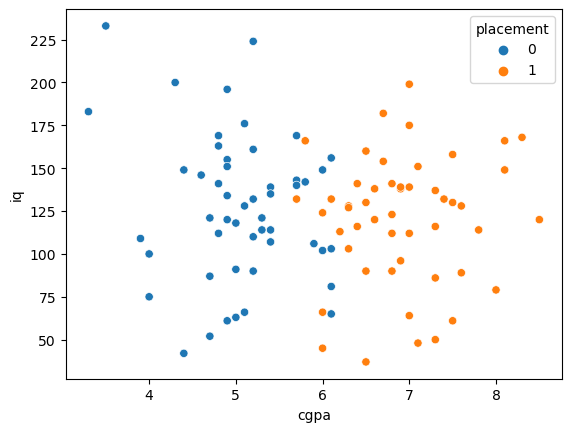

In [35]:
sns.scatterplot(x="cgpa", y="iq", hue="placement", data=dataset)

<AxesSubplot:xlabel='cgpa', ylabel='Density'>

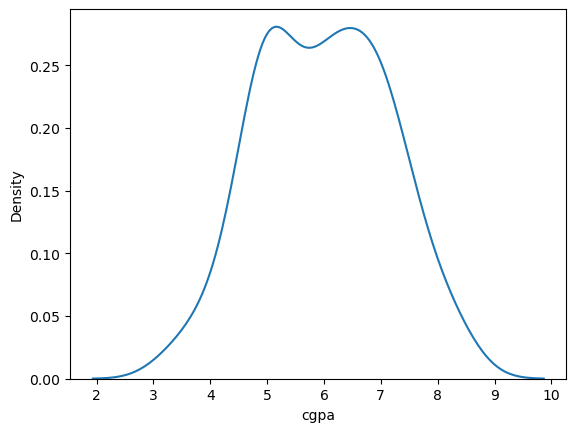

In [36]:
sns.kdeplot(data=dataset["cgpa"]) #check krna hai ki cgpa normml distribution me hai ya nahi

<AxesSubplot:xlabel='iq', ylabel='Density'>

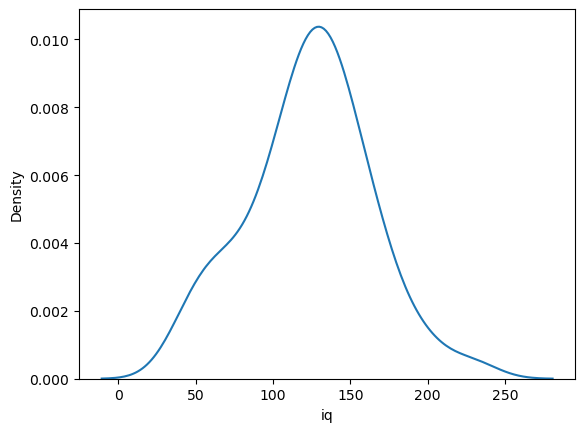

In [37]:
sns.kdeplot(data=dataset["iq"]) #check krna hai ki iq normml distribution me hai ya nahi

In [41]:
x = dataset.iloc[:,:-1]
y = dataset["placement"]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train

,cgpa,iq
55,7.8,114.0
88,4.4,149.0
26,7.0,199.0
42,7.6,89.0
69,8.5,120.0
...,...,...
60,6.9,139.0
71,6.1,132.0
14,6.1,103.0
92,5.2,110.0


In [ ]:
#ab jaise ki dono lagbhag lagbhag normally distributed hai, toh wha pr hum gaussian naive bayes theoram use krenge

#GAUSIAN NB

In [45]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
gau = GaussianNB()
gau.fit(x_train,y_train)

GaussianNB()

In [46]:
gau.score(x_test,y_test) #85% of the accuracy in the testing data,using the gausian theoram

0.85

In [48]:
gau.predict([[4.8, 141.0]])

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [50]:
gau.score(x_train,y_train) #91% accuracy in the training data, using the gausian theoram

0.9125

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<AxesSubplot:>

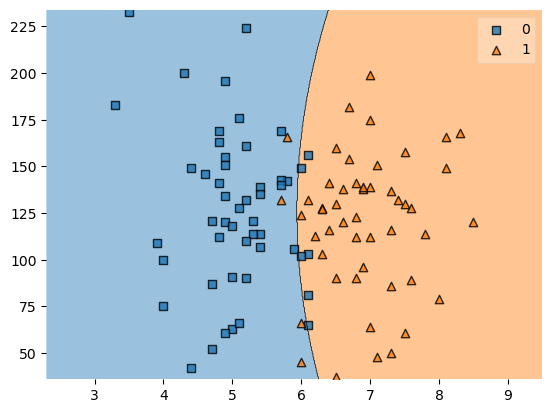

In [60]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=gau)

MULTINOMIAL NB

In [52]:
mul = MultinomialNB()
mul.fit(x_train,y_train)

MultinomialNB()

In [54]:
mul.score(x_test,y_test) , mul.score(x_train,y_train)

(0.95, 0.7)

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


<AxesSubplot:>

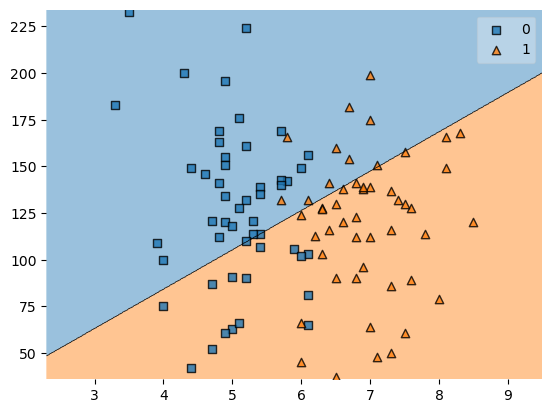

In [61]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=mul)

BERNOULI NB

In [56]:
ber = BernoulliNB()
ber.fit(x_train,y_train) #bernoulii me sabse bekaar accuracy aayi hai as compared to all other , issliye jab bhiii data 0 1 ke form me ho tbhi bernouli use krna chahiye

BernoulliNB()

In [57]:
ber.score(x_test,y_test) , ber.score(x_train,y_train) 

(0.5, 0.5)

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

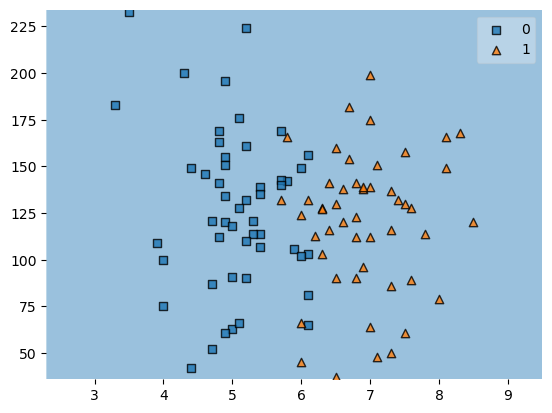

In [62]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=ber)